# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.random.seed(0)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/RESEARCH/wind speed prediction/Simikot/Data/2003_2022_simikot.csv")
data.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,...,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WD2M,WS10M,WD10M
0,2003,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,...,-15.72,-15.91,1.65,100.00,0.0,61.13,1.22,12.61,1.94,12.08
1,2003,1,1,17,0.0,0.0,0.0,0.0,0.0,0.0,...,-22.80,-17.01,0.85,35.12,0.0,61.42,1.78,19.47,3.06,18.94
2,2003,1,1,18,0.0,0.0,0.0,0.0,0.0,0.0,...,-24.76,-19.42,0.67,37.19,0.0,61.48,2.01,22.17,3.61,22.24
3,2003,1,1,19,0.0,0.0,0.0,0.0,0.0,0.0,...,-26.13,-21.13,0.61,39.06,0.0,61.54,2.13,21.96,3.91,22.06
4,2003,1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,...,-27.17,-22.71,0.55,42.56,0.0,61.58,2.28,20.92,4.29,21.14


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 175296 non-null  int64  
 1   MO                   175296 non-null  int64  
 2   DY                   175296 non-null  int64  
 3   HR                   175296 non-null  int64  
 4   ALLSKY_SFC_SW_DWN    175296 non-null  float64
 5   CLRSKY_SFC_SW_DWN    175296 non-null  float64
 6   TOA_SW_DWN           175296 non-null  float64
 7   ALLSKY_SFC_PAR_TOT   175296 non-null  float64
 8   CLRSKY_SFC_PAR_TOT   175296 non-null  float64
 9   ALLSKY_SFC_UVA       175296 non-null  float64
 10  ALLSKY_SFC_UVB       175296 non-null  float64
 11  ALLSKY_SFC_UV_INDEX  175296 non-null  float64
 12  T2M                  175296 non-null  float64
 13  T2MDEW               175296 non-null  float64
 14  T2MWET               175296 non-null  float64
 15  QV2M             

In [5]:
data.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,...,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WD2M,WS10M,WD10M
0,2003,1,1,5,0.0,0.0,0.0,0.0,0.0,0.0,...,-15.72,-15.91,1.65,100.00,0.0,61.13,1.22,12.61,1.94,12.08
1,2003,1,1,17,0.0,0.0,0.0,0.0,0.0,0.0,...,-22.80,-17.01,0.85,35.12,0.0,61.42,1.78,19.47,3.06,18.94
2,2003,1,1,18,0.0,0.0,0.0,0.0,0.0,0.0,...,-24.76,-19.42,0.67,37.19,0.0,61.48,2.01,22.17,3.61,22.24
3,2003,1,1,19,0.0,0.0,0.0,0.0,0.0,0.0,...,-26.13,-21.13,0.61,39.06,0.0,61.54,2.13,21.96,3.91,22.06
4,2003,1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,...,-27.17,-22.71,0.55,42.56,0.0,61.58,2.28,20.92,4.29,21.14


In [6]:
import pandas as pd

data["YEAR"] = data["YEAR"].astype(float)
data["MO"] = data["MO"].astype(float)
data["DY"] = data["DY"].astype(float)
data["HR"] = data["HR"].astype(float)

In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
Target=data['WS10M']

In [9]:
Target

,WS10M
0,1.94
1,3.06
2,3.61
3,3.91
4,4.29
...,...
175291,5.16
175292,2.24
175293,2.81
175294,5.97


In [10]:
features = data.drop(['WS2M','WD2M','WS10M','WD10M'], axis=1) #dropping the unnecessary parameters which are related to wind speed.

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 175296 non-null  float64
 1   MO                   175296 non-null  float64
 2   DY                   175296 non-null  float64
 3   HR                   175296 non-null  float64
 4   ALLSKY_SFC_SW_DWN    175296 non-null  float64
 5   CLRSKY_SFC_SW_DWN    175296 non-null  float64
 6   TOA_SW_DWN           175296 non-null  float64
 7   ALLSKY_SFC_PAR_TOT   175296 non-null  float64
 8   CLRSKY_SFC_PAR_TOT   175296 non-null  float64
 9   ALLSKY_SFC_UVA       175296 non-null  float64
 10  ALLSKY_SFC_UVB       175296 non-null  float64
 11  ALLSKY_SFC_UV_INDEX  175296 non-null  float64
 12  T2M                  175296 non-null  float64
 13  T2MDEW               175296 non-null  float64
 14  T2MWET               175296 non-null  float64
 15  QV2M             

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, Target, test_size=0.2)

Esemble learning

#xgb_model training

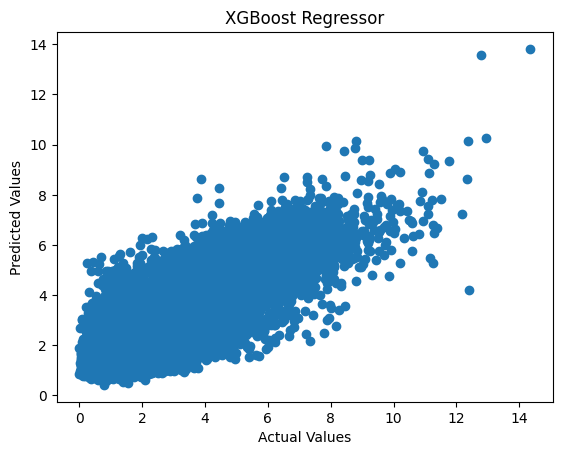

XGBoost Regressor:
Mean Squared Error: 0.6732657075932232
Mean Absolute Error: 0.5935947122603774
R-squared (R2) Score: 0.8135597330465059


['/content/drive/MyDrive/DataWind/your_model_name_xgb_rasuwa_Temp.pkl']

In [13]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, xgb_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regressor")
plt.show()

print("XGBoost Regressor:")
print(f"Mean Squared Error: {xgb_mse}")
print(f"Mean Absolute Error: {xgb_mae}")
print(f"R-squared (R2) Score: {xgb_r2}")
joblib.dump(xgb_model, '/content/drive/MyDrive/DataWind/your_model_name_xgb_rasuwa_Temp.pkl')

# xgb_model testing

R-squared (R2) error: 0.76


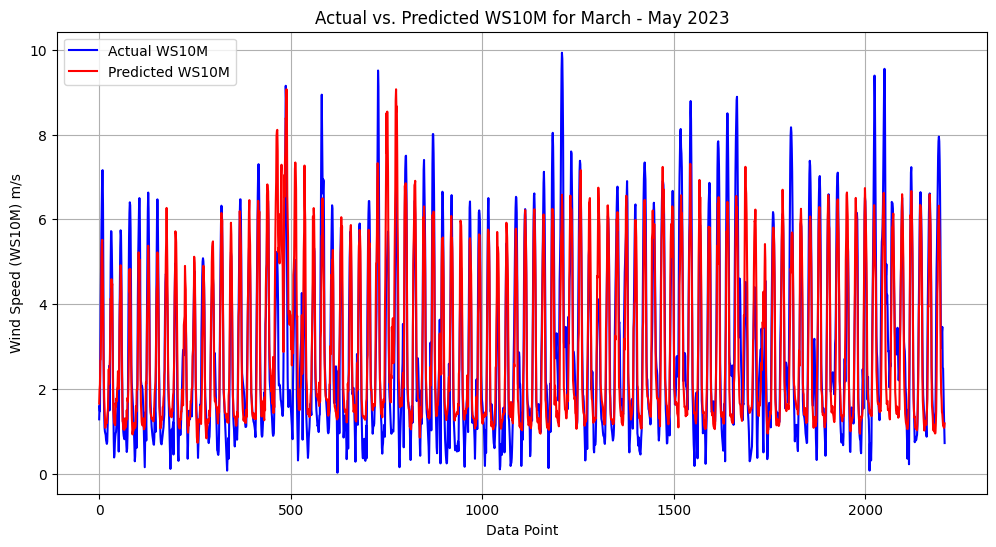

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import joblib
model = joblib.load('/content/drive/MyDrive/DataWind/your_model_name_xgb_rasuwa_Temp.pkl')
# Load your new data for Jul-Aug (replace with your data file)
mar_may_data = pd.read_csv("/content/drive/MyDrive/RESEARCH/wind speed prediction/Simikot/Data/2023_mar-may_simikot.csv")
# Extract the actual WS10M values from your new data
actual_WS10M = mar_may_data['WS10M']

# Drop unnecessary columns (if needed)
# For example, if 'WS2M' is not needed for prediction
mar_may_data = mar_may_data.drop(['WS2M','WD2M','WS10M','WD10M'], axis=1)


# Make predictions on the new data
predictions = model.predict(mar_may_data)

# Calculate the R-squared (R2) error
r2 = r2_score(actual_WS10M, predictions)

# Print R-squared error
print(f"R-squared (R2) error: {r2:.2f}")

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_WS10M, label='Actual WS10M', color='blue')
plt.plot(predictions, label='Predicted WS10M', color='red')
plt.title('Actual vs. Predicted WS10M for March - May 2023')
plt.xlabel('Data Point')
plt.ylabel('Wind Speed (WS10M) m/s')
plt.legend()
plt.grid(True)
plt.show()

# RF_model training

In [15]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.6066241370964062
Mean Absolute Error: 0.5416296862521393


In [16]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, predictions)

print(f"R-squared: {r2}")

R-squared: 0.8320140699501959


# RF_model testing

R-squared (R2) error: 0.74


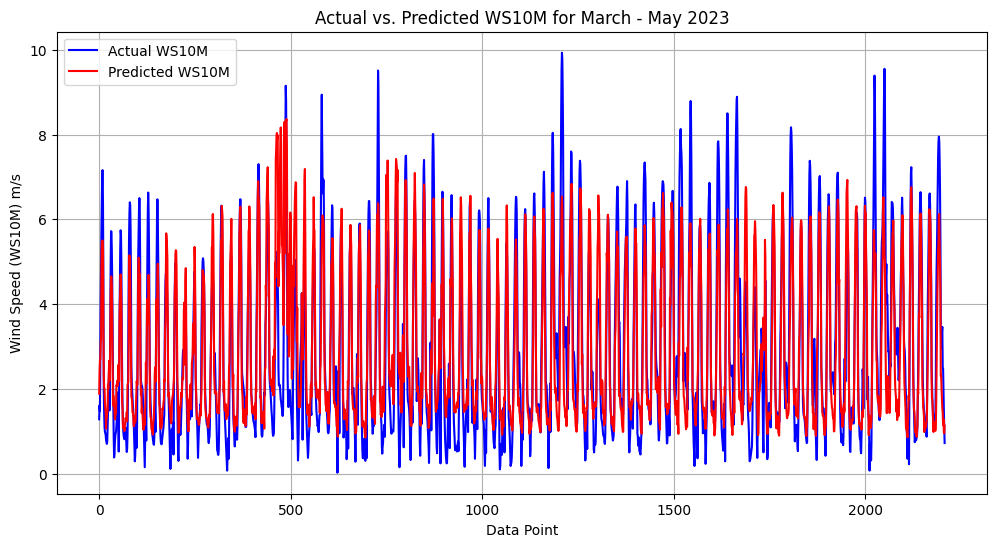

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
# Load your new data for Jul-Aug (replace with your data file)
mar_may_data = pd.read_csv("/content/drive/MyDrive/RESEARCH/wind speed prediction/Simikot/Data/2023_mar-may_simikot.csv")

# Extract the actual WS10M values from your new data
actual_WS10M = mar_may_data['WS10M']

# Drop unnecessary columns (if needed)
# For example, if 'WS2M' is not needed for prediction
mar_may_data = mar_may_data.drop(['WS2M','WD2M','WS10M','WD10M'], axis=1)

# Make predictions on the new data
predictions = model.predict(mar_may_data)

# Calculate the R-squared (R2) error
r2 = r2_score(actual_WS10M, predictions)

# Print R-squared error
print(f"R-squared (R2) error: {r2:.2f}")

# Plot the actual vs. predicted values

plt.figure(figsize=(12, 6))
plt.plot(actual_WS10M, label='Actual WS10M', color='blue')
plt.plot(predictions, label='Predicted WS10M', color='red')
plt.title('Actual vs. Predicted WS10M for March - May 2023')
plt.xlabel('Data Point')
plt.ylabel('Wind Speed (WS10M) m/s')
plt.legend()
plt.grid(True)
plt.show()


# KNN_model training

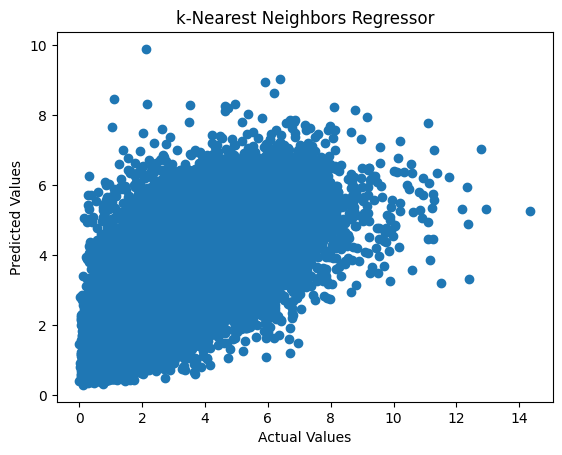

k-Nearest Neighbors Regressor:
Mean Squared Error: 1.1025742933257272
Mean Absolute Error: 0.7144939532230463
R-squared (R2) Score: 0.6946759009625549


['/content/drive/MyDrive/DataWind/your_model_name_knn_rasuwa_Temp.pkl']

In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Initialize the k-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn_model.predict(X_test)

# Evaluate the KNN model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, knn_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("k-Nearest Neighbors Regressor")
plt.show()

print("k-Nearest Neighbors Regressor:")
print(f"Mean Squared Error: {knn_mse}")
print(f"Mean Absolute Error: {knn_mae}")
print(f"R-squared (R2) Score: {knn_r2}")

# Save the KNN model to a file using joblib
joblib.dump(knn_model, '/content/drive/MyDrive/DataWind/your_model_name_knn_rasuwa_Temp.pkl')


# KNN_model testing

R-squared (R2) error: 0.66


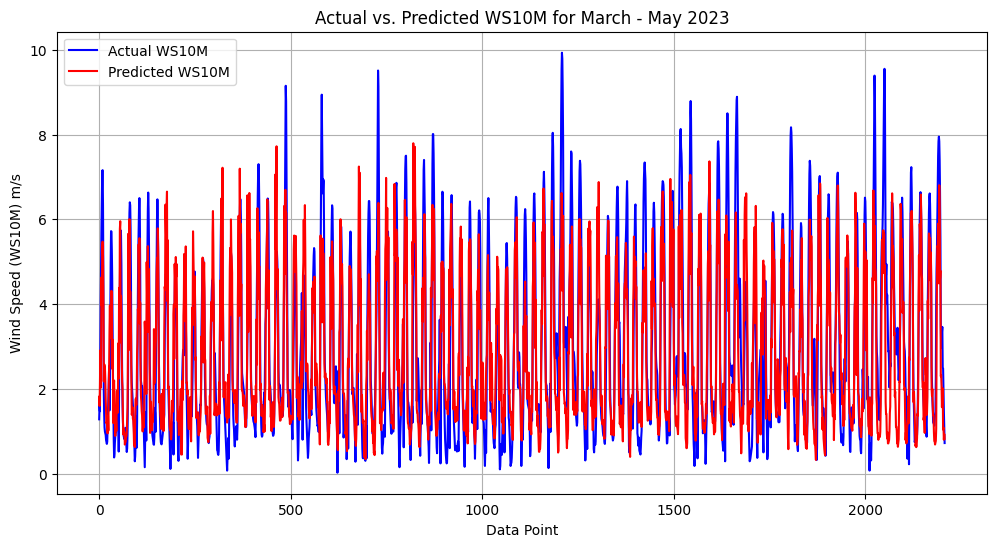

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import joblib

# Load the saved KNN model
model = joblib.load('/content/drive/MyDrive/DataWind/your_model_name_knn_rasuwa_Temp.pkl')


# Load your new data for Jul-Aug (replace with your data file)
mar_may_data = pd.read_csv("/content/drive/MyDrive/RESEARCH/wind speed prediction/Simikot/Data/2023_mar-may_simikot.csv")

# Extract the actual WS10M values from your new data
actual_WS10M = mar_may_data['WS10M']

# Drop unnecessary columns (if needed)
# For example, if 'WS2M' is not needed for prediction
mar_may_data = mar_may_data.drop(['WS2M','WD2M','WS10M','WD10M'], axis=1)

# Make predictions on the new data
predictions = model.predict(mar_may_data)

# Calculate the R-squared (R2) error
r2 = r2_score(actual_WS10M, predictions)

# Print R-squared error
print(f"R-squared (R2) error: {r2:.2f}")

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_WS10M, label='Actual WS10M', color='blue')
plt.plot(predictions, label='Predicted WS10M', color='red')
plt.title('Actual vs. Predicted WS10M for March - May 2023')
plt.xlabel('Data Point')
plt.ylabel('Wind Speed (WS10M) m/s')
plt.legend()
plt.grid(True)
plt.show()